In [11]:
A = matrix(c(1,4,2,3), ncol=2)
X = matrix(c(-1,0), ncol=1)
A%*%X

-1
-4


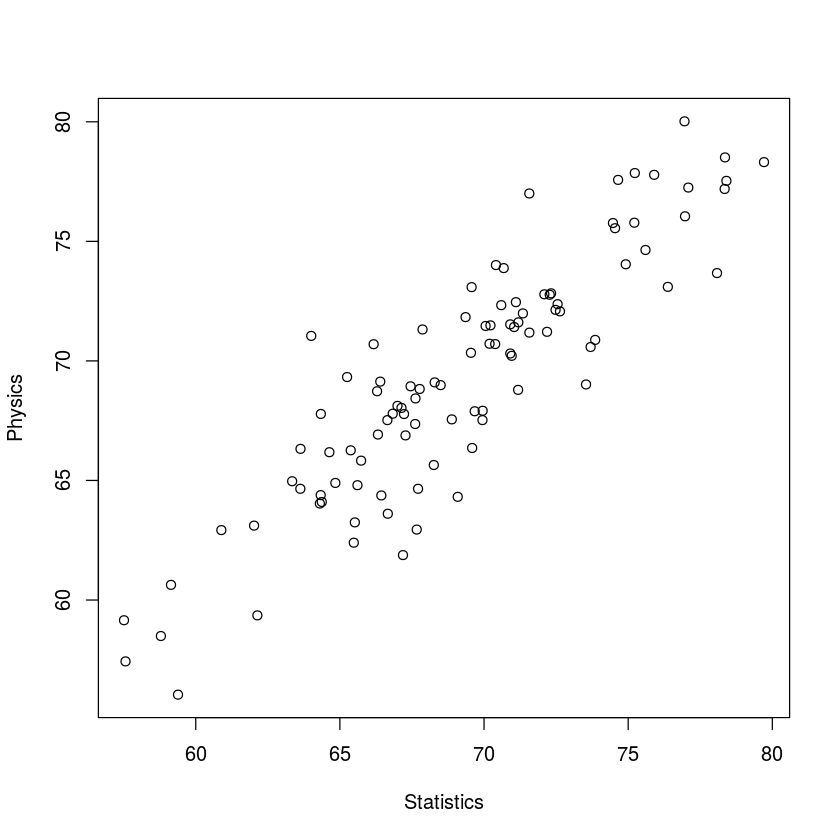

In [3]:
#require(splus2R)
data = as.data.frame(rmvnorm( 100, rho=0.9 ) * 5+70)
colnames(data) = c("Statistics", "Physics")
plot(data)

# This step is used to centralize the data around (0,0)

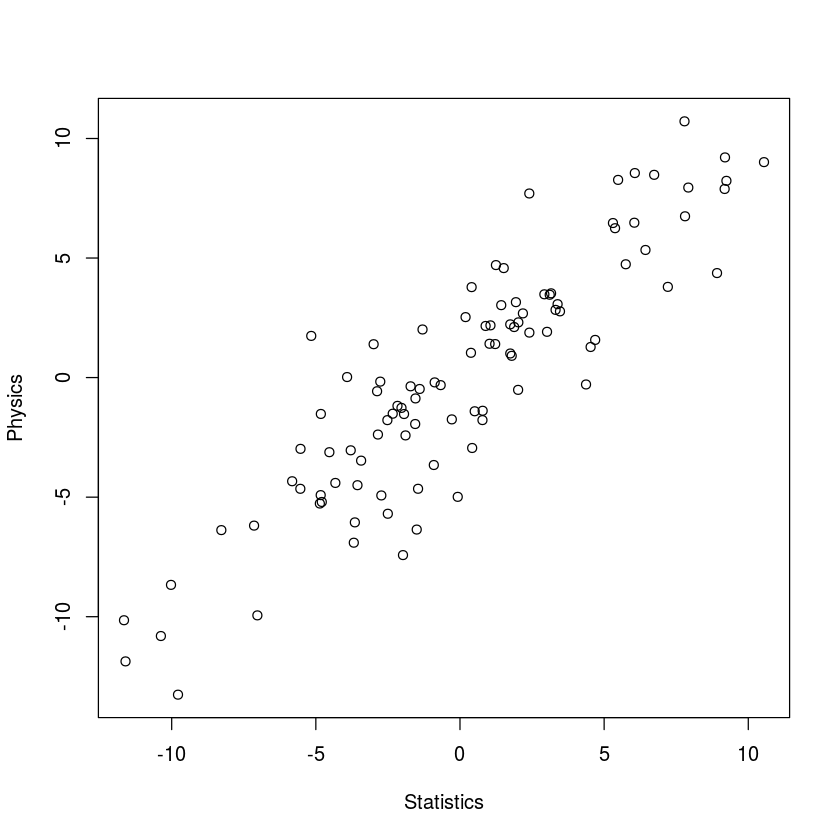

In [6]:
scaled = apply(data, 2, function(x) { x - mean(x)} )
plot(scaled)

In [8]:
scaled.cov = cov(scaled)
scaled.cov

,Statistics,Physics
Statistics,23.46570,21.93498
Physics,21.93498,25.62420


In [9]:
eigens = eigen(scaled.cov)
eigens

0.6895133,-0.7242730
0.7242730,0.6895133


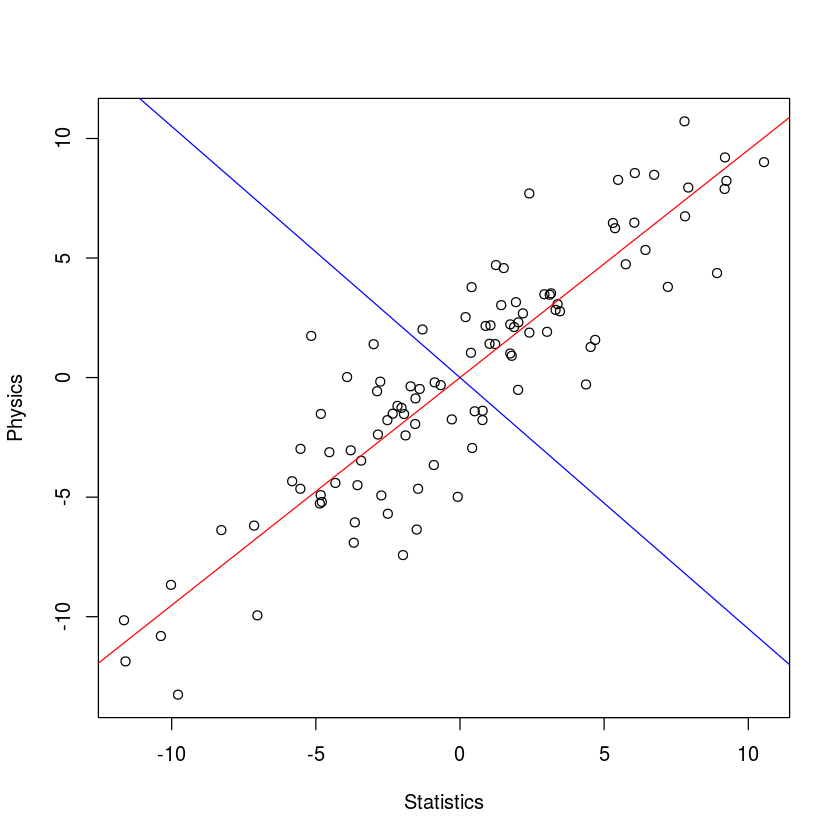

In [12]:
scaled = apply(data, 2, function(x) { x - mean(x)} )
plot(scaled)
pc1.slope = eigens$vectors[1,1]/eigens$vectors[2,1]
pc2.slope = eigens$vectors[1,2]/eigens$vectors[2,2]
abline(0, pc1.slope, col="red")
abline(0, pc2.slope, col="blue")

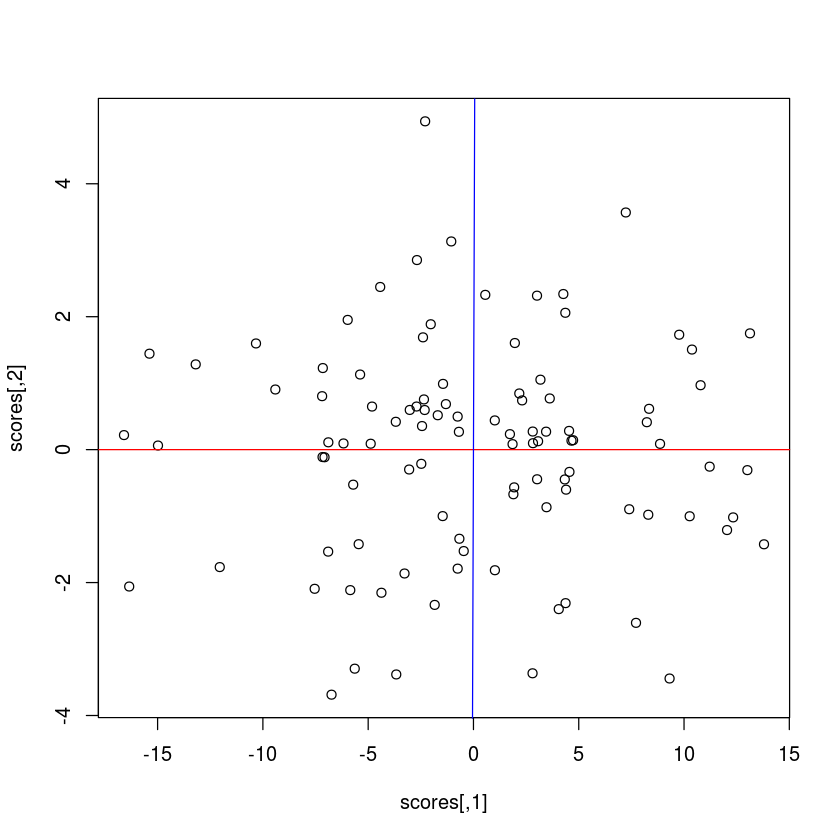

In [14]:
scores = scaled %*% eigens$vectors
plot(scores)
abline(0,0,col="red")
abline(0,90,col="blue")

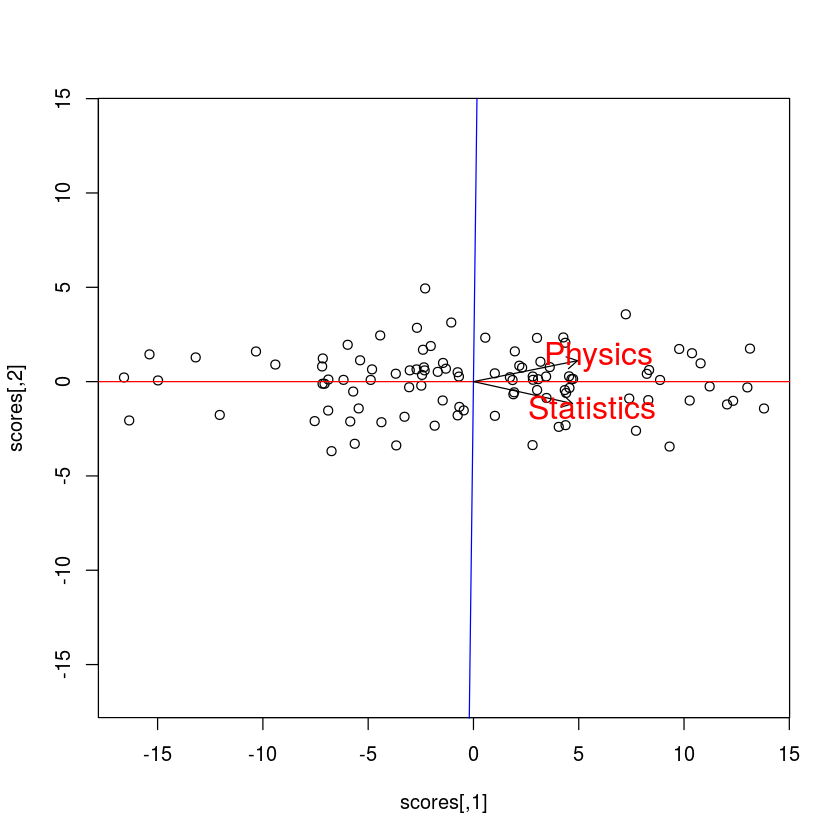

In [15]:
plot(scores, xlim=range(scores), ylim=range(scores))
abline(0,0,col="red"); abline(0,90,col="blue")
sd = sqrt(eigens$values); factor=1
arrows(0,0,eigens$vectors[,1]*sd[1]/factor,
eigens$vectors[,2]*sd[2]/factor, length=0.1, col=1)
text(eigens$vectors[,1]*sd[1]/factor*1.2,
eigens$vectors[,2]*sd[2]/factor*1.2,
c("Statistics", "Physics"), cex=1.6, col=2)

In [16]:
cor(data)

,Statistics,Physics
Statistics,1.0000000,0.8945311
Physics,0.8945311,1.0000000
